<a href="https://colab.research.google.com/github/skrofman/Applied-Machine-Learning/blob/master/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Q1: A stopword is...:**

A word that is removed from the analysis.

**Q2: Check each of the processes you undertake before entering a text value into your corpus.**

*   Remove any extra characters or words that are not informative.
*   Convert each word to it's root.
*   Ensure all words are lower or upper case in the same way.





**Q3: In order to remove any characters that are not lowercase, uppercase, numeric (0 to 9) or spaces, what is the correct line of regex code for the below example (in Python)? X = "The answer to this question is a secret."**

re.sub('[^a-zA-Z0-9 ]', '', X)


**Q4: NLP can be used for both probabilistic (soft) and discrete (hard) classification problems.**

False

**Q5: Which of the below is not a step unique to pre-processing text data?**

Imputation of any missing values

**Q6: NLP can leverage the same classification algorithms used in other machine learning contexts.**

True

**Q7: For all the remaining questions we use the winemagdata130kv2 dataset and we ramdonly subset 7000 reviews with a random state = 310.  If we plot a histogram of the target variable do we see that the distribution is almost normal ?**

True

In [1]:
import nltk
nltk.download('punkt')
import numpy as np
import matplotlib.pyplot as plt
from nltk import download
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score as acc
import heapq 
import re
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
%%time
wine_data = pd.read_csv('/content/drive/MyDrive/winemagdata130kv2.csv',quoting=2)
wines = wine_data[["description","points"]]
wines_subset = wines.sample(7000,random_state=310).reset_index(drop=True)
corpus = []

for i in range(0,len(wines_subset)):
    wine_descriptions = re.sub('[^a-zA-Z0-9 ]','',wines_subset["description"][i])
    wine_descriptions=wine_descriptions.lower()
    wine_descriptions = wine_descriptions.split()
    wine_descriptions = [word for word in wine_descriptions if not word in set(stopwords.words('english'))]
    stemmer = PorterStemmer()
    wine_descriptions = [stemmer.stem(word) for word in wine_descriptions]
    wine_descriptions = " ".join(wine_descriptions)
    corpus.append(wine_descriptions)

CPU times: user 37.2 s, sys: 3.33 s, total: 40.6 s
Wall time: 40.6 s


In [12]:
%%time
countVec = CountVectorizer()
X_raw = countVec.fit_transform(corpus)
X = X_raw.toarray()

CPU times: user 239 ms, sys: 72.2 ms, total: 312 ms
Wall time: 315 ms


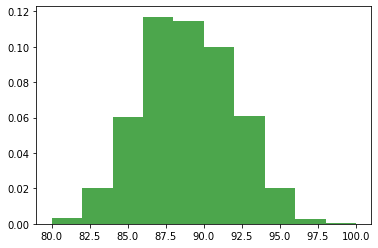

In [13]:
#### Visualize the distribution of the wine ratings (points)
n, bins, patches = plt.hist(wines_subset["points"].values,10,density=1,facecolor='green',alpha=0.7)

**Q8: For all the remaining questions we use the winemagdata130kv2 dataset and we ramdonly subset 7000 reviews with a random state = 310 and we preprocess in the sense of Natural Language Processing (as explained in class) all the customer reviews. We label as Good those wines who had more than 90 points (in the target variable). We subset the data into Train and Test sets such that the Test set is about 25% and we train a logistic regression classifier. When this model is applied to the Test set we see that the number of  Good correctly classified as Good is**

261

In [14]:
y = wines_subset["points"]
y = y.where(y>90,other=0).where(y<=90,other=1).values

In [30]:
X_train, X_test, Y_train, Y_test = tts(X,y,random_state=310, test_size=0.25)
#scale_X = StandardScaler()
#X_train = scale_X.fit_transform(X_train)
#X_test = scale_X.transform(X_test)
classifier = LogisticRegression(random_state=310, solver='lbfgs')
classifier.fit(X_train,Y_train)
Y_pred = classifier.predict(X_test)

In [31]:
spc = ['Bad','Good']
cm = confusion_matrix(Y_test,Y_pred)
pd.DataFrame(cm, columns=spc, index=spc)

,Bad,Good
Bad,1206,97
Good,186,261


**Q9: The overall accuracy for applying the logistic regression classifier on the Test set is (as a percetage with 2 decimals, eg.format like 53.74 without rounding):**

0.8382857142857143

In [32]:
acc(Y_test,Y_pred)

0.8382857142857143

In [33]:
#X_train, X_test, Y_train, Y_test = tts(X,y,test_size=0.25)
cls = RandomForestClassifier(max_depth=150, n_estimators = 500, random_state=310)
cls.fit(X_train,Y_train)
Y_pred = cls.predict(X_test)

**Q10: If we train a random forest classifier with 500 trees and a max_depth of 150 then the number of not good winse classified correctly as not good is**

1303

In [34]:
spc = ['Bad','Good']
cm = confusion_matrix(Y_test,Y_pred)
pd.DataFrame(cm, columns=spc, index=spc)

,Bad,Good
Bad,1303,0
Good,406,41
